In [33]:
import numpy as np
import pandas as pd
import cv2
import os
from glob import glob
import matplotlib.pyplot as plt
from keras.applications import ResNet50
from keras.models import Model
from keras.utils import to_categorical
from keras_preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.utils import plot_model
from keras.models import Model, Sequential
from keras.layers import Input
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Flatten,Input, Convolution2D, Dropout, LSTM, TimeDistributed, Embedding, Bidirectional, Activation, RepeatVector,Concatenate
from keras.models import Sequential, Model


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
images_path = 'archive (9)/Flickr_Data/Images/'
images = glob(images_path+'*.jpg')
len(images)

8091

In [34]:
images[:5]

['archive (9)/Flickr_Data/Images/2387197355_237f6f41ee.jpg',
 'archive (9)/Flickr_Data/Images/2609847254_0ec40c1cce.jpg',
 'archive (9)/Flickr_Data/Images/2046222127_a6f300e202.jpg',
 'archive (9)/Flickr_Data/Images/2853743795_e90ebc669d.jpg',
 'archive (9)/Flickr_Data/Images/2696951725_e0ae54f6da.jpg']

In [42]:
for i in range(5):
    plt.figure()
    img = cv2.imread(images[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #plt.imshow(img)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [36]:

incept_model = ResNet50(include_top=True)

last = incept_model.layers[-2].output
modele = Model(inputs = incept_model.input,outputs = last)
modele.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [37]:
images_features = {}
count = 0
for i in images:
    img = cv2.imread(i)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224,224))

    img = img.reshape(1,224,224,3)
    pred = modele.predict(img).reshape(2048,)

    img_name = i.split('/')[-1]

    images_features[img_name] = pred

    count += 1


    if count % 50 == 0:
        print(count)


1/1 [==============================] - 0s 62ms/step
50
1/1 [==============================] - 0s 62ms/step
100
1/1 [==============================] - 0s 66ms/step
150
1/1 [==============================] - 0s 66ms/step
200
1/1 [==============================] - 0s 60ms/step
250
1/1 [==============================] - 0s 67ms/step
300
1/1 [==============================] - 0s 68ms/step
350
1/1 [==============================] - 0s 65ms/step
400
1/1 [==============================] - 0s 64ms/step
450
1/1 [==============================] - 0s 68ms/step
500
1/1 [==============================] - 0s 62ms/step
550
1/1 [==============================] - 0s 84ms/step
600
1/1 [==============================] - 0s 64ms/step
650
1/1 [==============================] - 0s 69ms/step
700
1/1 [==============================] - 0s 70ms/step
750
1/1 [==============================] - 0s 69ms/step
800
1/1 [==============================] - 0s 64ms/step
850
1/1 [==============================] - 0s 69ms/st

In [38]:
len(images_features)

8091

In [11]:
caption_path = 'archive (9)/Flickr_Data/Flickr_TextData/Flickr8k.token.txt'

In [12]:
captions = open(caption_path, 'rb').read().decode('utf-8').split('\n')

In [13]:
len(captions)

40461

In [15]:
captions_dict = {}
for i in captions:
    try:
        img_name = i.split('\t')[0][:-2]
        caption = i.split('\t')[1]
        if img_name in images_features:
            if img_name not in captions_dict:
                captions_dict[img_name] = [caption]

            else:
                captions_dict[img_name].append(caption)

    except:
        pass

In [16]:
len(captions_dict)

1500

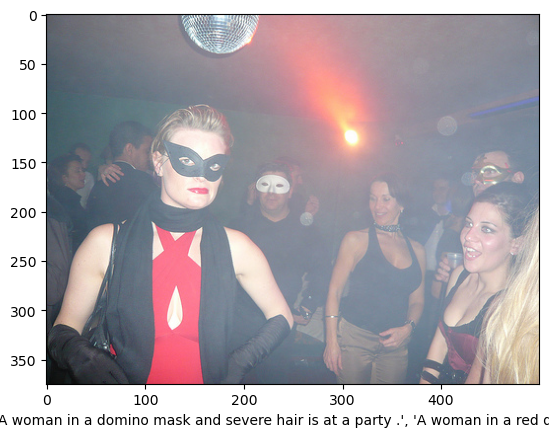

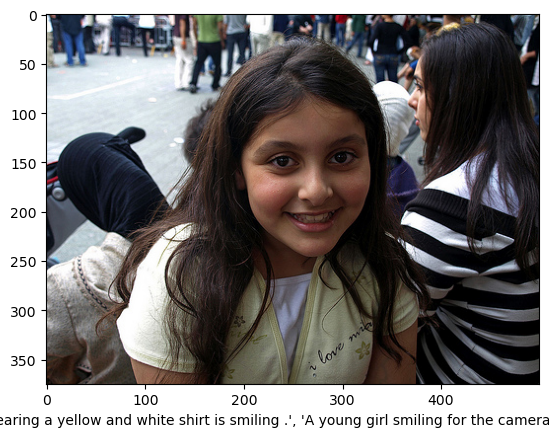

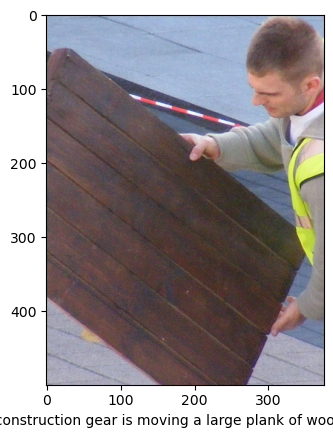

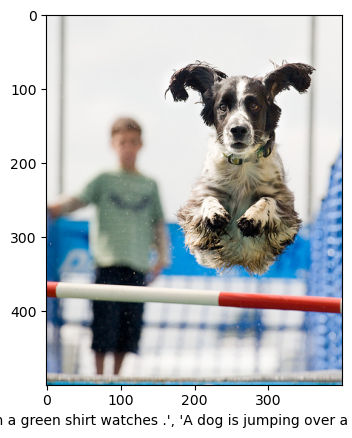

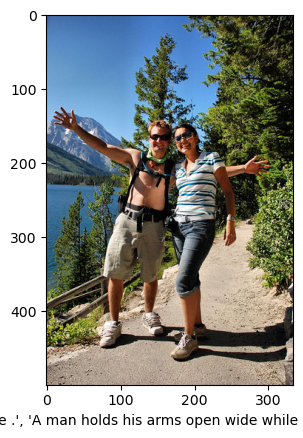

In [17]:
import matplotlib.pyplot as plt

for i in range(5):
    plt.figure()
    img_name = images[i]


    img = cv2.imread(img_name)

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.xlabel(captions_dict[img_name.split('/')[-1]])
    plt.imshow(img)

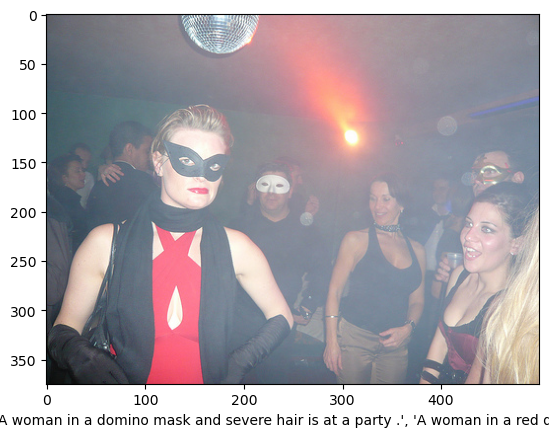

In [18]:
import matplotlib.pyplot as plt

for k in images_features.keys():
    plt.figure()

    img_name = 'archive (9)/Flickr_Data/Images/' + k


    img = cv2.imread(img_name)

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.xlabel(captions_dict[img_name.split('/')[-1]])
    plt.imshow(img)

    break

In [19]:
def preprocessed(txt):
    modified = txt.lower()
    modified = 'startofseq ' + modified + ' endofseq'
    return modified


In [20]:
for k,v in captions_dict.items():
    for vv in v:
        captions_dict[k][v.index(vv)] = preprocessed(vv)


In [21]:
count_words = {}
for k,vv in captions_dict.items():
    for v in vv:
        for word in v.split():
            if word not in count_words:

                count_words[word] = 0

            else:
                count_words[word] += 1

len(count_words)

3926

In [22]:
THRESH = -1
count = 1
new_dict = {}
for k,v in count_words.items():
    if count_words[k] > THRESH:
        new_dict[k] = count
        count += 1

len(new_dict)

3926

In [23]:
new_dict['<OUT>'] = len(new_dict)
captions_backup = captions_dict.copy()
captions_dict = captions_backup.copy()

In [24]:
for k, vv in captions_dict.items():
    for v in vv:
        encoded = []
        for word in v.split():
            if word not in new_dict:
                encoded.append(new_dict['<OUT>'])
            else:
                encoded.append(new_dict[word])


        captions_dict[k][vv.index(v)] = encoded

In [25]:
captions_dict

{'1002674143_1b742ab4b8.jpg': [[1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   6,
   9,
   10,
   2,
   11,
   12,
   13,
   14,
   15,
   6,
   2,
   16,
   17,
   18],
  [1, 2, 3, 4, 19, 20, 6, 9, 10, 2, 21, 11, 12, 17, 18],
  [1,
   2,
   22,
   4,
   6,
   23,
   24,
   25,
   13,
   26,
   6,
   9,
   10,
   2,
   27,
   28,
   13,
   2,
   12,
   29,
   30,
   17,
   18],
  [1, 31, 19, 2, 4, 13, 32, 20, 6, 9, 10, 2, 12, 33, 17, 18],
  [1, 34, 4, 13, 32, 33, 35, 6, 23, 24, 17, 18]],
 '1009434119_febe49276a.jpg': [[1,
   2,
   36,
   37,
   27,
   38,
   19,
   39,
   6,
   2,
   40,
   41,
   42,
   43,
   2,
   27,
   44,
   17,
   18],
  [1, 2, 36, 37, 27, 38, 19, 39, 45, 23, 24, 17, 18],
  [1, 2, 46, 47, 19, 39, 6, 23, 24, 17, 18],
  [1, 2, 46, 47, 19, 39, 29, 48, 49, 24, 6, 9, 10, 2, 27, 44, 17, 18],
  [1, 2, 38, 50, 29, 23, 49, 24, 51, 2, 52, 44, 17, 18]],
 '1019077836_6fc9b15408.jpg': [[1,
   2,
   53,
   38,
   54,
   23,
   55,
   56,
   2,
   57,
   29,
   2,
   58,
   1

In [26]:
MAX_LEN = 0
for k, vv in captions_dict.items():
    for v in vv:
        if len(v) > MAX_LEN:
            MAX_LEN = len(v)
            print(v)

[1, 2, 3, 4, 5, 6, 7, 8, 6, 9, 10, 2, 11, 12, 13, 14, 15, 6, 2, 16, 17, 18]
[1, 2, 22, 4, 6, 23, 24, 25, 13, 26, 6, 9, 10, 2, 27, 28, 13, 2, 12, 29, 30, 17, 18]
[1, 2, 62, 37, 63, 64, 65, 66, 67, 43, 23, 68, 65, 20, 69, 70, 2, 71, 13, 2, 51, 43, 72, 17, 18]
[1, 2, 81, 19, 180, 23, 181, 10, 2, 82, 140, 70, 115, 116, 6, 9, 10, 182, 183, 177, 178, 81, 179, 29, 17, 18]
[1, 23, 4, 6, 23, 257, 246, 258, 19, 150, 69, 70, 112, 34, 154, 259, 260, 19, 251, 2, 36, 261, 37, 23, 205, 19, 262, 263, 17, 18]
[1, 177, 260, 27, 38, 19, 35, 23, 231, 65, 178, 27, 38, 13, 2, 36, 2164, 29, 123, 312, 19, 216, 152, 2, 373, 232, 231, 177, 495, 526, 43, 2, 41, 59, 17, 18]


In [27]:
Batch_size = 5000
VOCAB_SIZE = len(new_dict)

def generator(photo, caption):
    n_samples = 0

    X = []
    y_in = []
    y_out = []

    for k, vv in caption.items():
        for v in vv:
            for i in range(1, len(v)):
                X.append(photo[k])

                in_seq= [v[:i]]
                out_seq = v[i]

                in_seq = pad_sequences(in_seq, maxlen=MAX_LEN, padding='post', truncating='post')[0]
                out_seq = to_categorical([out_seq], num_classes=VOCAB_SIZE)[0]

                y_in.append(in_seq)
                y_out.append(out_seq)

    return X, y_in, y_out

In [28]:
X, y_in, y_out = generator(images_features, captions_dict)
len(X), len(y_in), len(y_out)
MAX_LEN

36

In [29]:
len(X), len(y_in), len(y_out)

(96647, 96647, 96647)

In [30]:
X = np.array(X)
y_in = np.array(y_in, dtype='float64')
y_out = np.array(y_out, dtype='float64')
X.shape, y_in.shape, y_out.shape

((96647, 2048), (96647, 36), (96647, 3927))

In [31]:
embedding_size = 128
max_len = MAX_LEN
vocab_size = len(new_dict)

image_model = Sequential()

image_model.add(Dense(embedding_size, input_shape=(2048,), activation='relu'))
image_model.add(RepeatVector(max_len))

image_model.summary()

language_model = Sequential()

language_model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=max_len))
language_model.add(LSTM(256, return_sequences=True))
language_model.add(TimeDistributed(Dense(embedding_size)))

language_model.summary()

conca = Concatenate()([image_model.output, language_model.output])
x = LSTM(128, return_sequences=True)(conca)
x = LSTM(512, return_sequences=False)(x)
x = Dense(vocab_size)(x)
out = Activation('softmax')(x)
model = Model(inputs=[image_model.input, language_model.input], outputs = out)

# model.load_weights("../input/model_weights.h5")
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               262272    
                                                                 
 repeat_vector (RepeatVector  (None, 36, 128)          0         
 )                                                               
                                                                 
Total params: 262,272
Trainable params: 262,272
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 36, 128)           502656    
                                                                 
 lstm (LSTM)                 (None, 36, 256)           394240    
                            

In [32]:
model.fit([X, y_in], y_out, batch_size=512, epochs=50)

Epoch 1/50
189/189 [==============================] - 181s 942ms/step - loss: 5.3238 - accuracy: 0.1168
Epoch 2/50
189/189 [==============================] - 203s 1s/step - loss: 5.1452 - accuracy: 0.1200
Epoch 3/50
189/189 [==============================] - 321s 2s/step - loss: 5.0683 - accuracy: 0.1194
Epoch 4/50
 51/189 [=======>......................] - ETA: 3:27 - loss: 5.0248 - accuracy: 0.1191

KeyboardInterrupt: 

In [ ]:
inv_dict = {v:k for k, v in new_dict.items()}

In [ ]:
model.save('model.h5')

In [ ]:
model.save_weights('mine_model_weights.h5')
np.save('vocab.npy', new_dict)

def getImage(x):

    test_img_path = images[x]

    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

    test_img = cv2.resize(test_img, (299,299))

    test_img = np.reshape(test_img, (1,299,299,3))

    return test_img

In [ ]:
for i in range(5):

    no = np.random.randint(1500,7000,(1,1))[0,0]
    test_feature = modele.predict(getImage(no)).reshape(1,2048)

    test_img_path = images[no]
    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)


    text_inp = ['startofseq']

    count = 0
    caption = ''
    while count < 25:
        count += 1

        encoded = []
        for i in text_inp:
            encoded.append(new_dict[i])

        encoded = [encoded]

        encoded = pad_sequences(encoded, padding='post', truncating='post', maxlen=MAX_LEN)
        prediction = np.argmax(model.predict([test_feature, encoded]))

        sampled_word = inv_dict[prediction]

        caption = caption + ' ' + sampled_word

        if sampled_word == 'endofseq':
            break

        text_inp.append(sampled_word)

    plt.figure()
    plt.imshow(test_img)
    plt.xlabel(caption)
